# **PSORIASIS (Allosteric Tyrosine Kinase 2)**

This is a drug discovery Machine Learning Model project created by me for my personal hobby and is based on the tutorial by Data Professor and my previous ML model project. 

Here is the link of his YouTube Channel : https://www.youtube.com/watch?v=plVLRashaA8

and here is the link for the first project:
https://github.com/jeromeslash83/Data-Science/tree/main/Drug%20Discover%20ML%20Model/Alzheimer's%20Disease%20(Amyloid%20Beta)

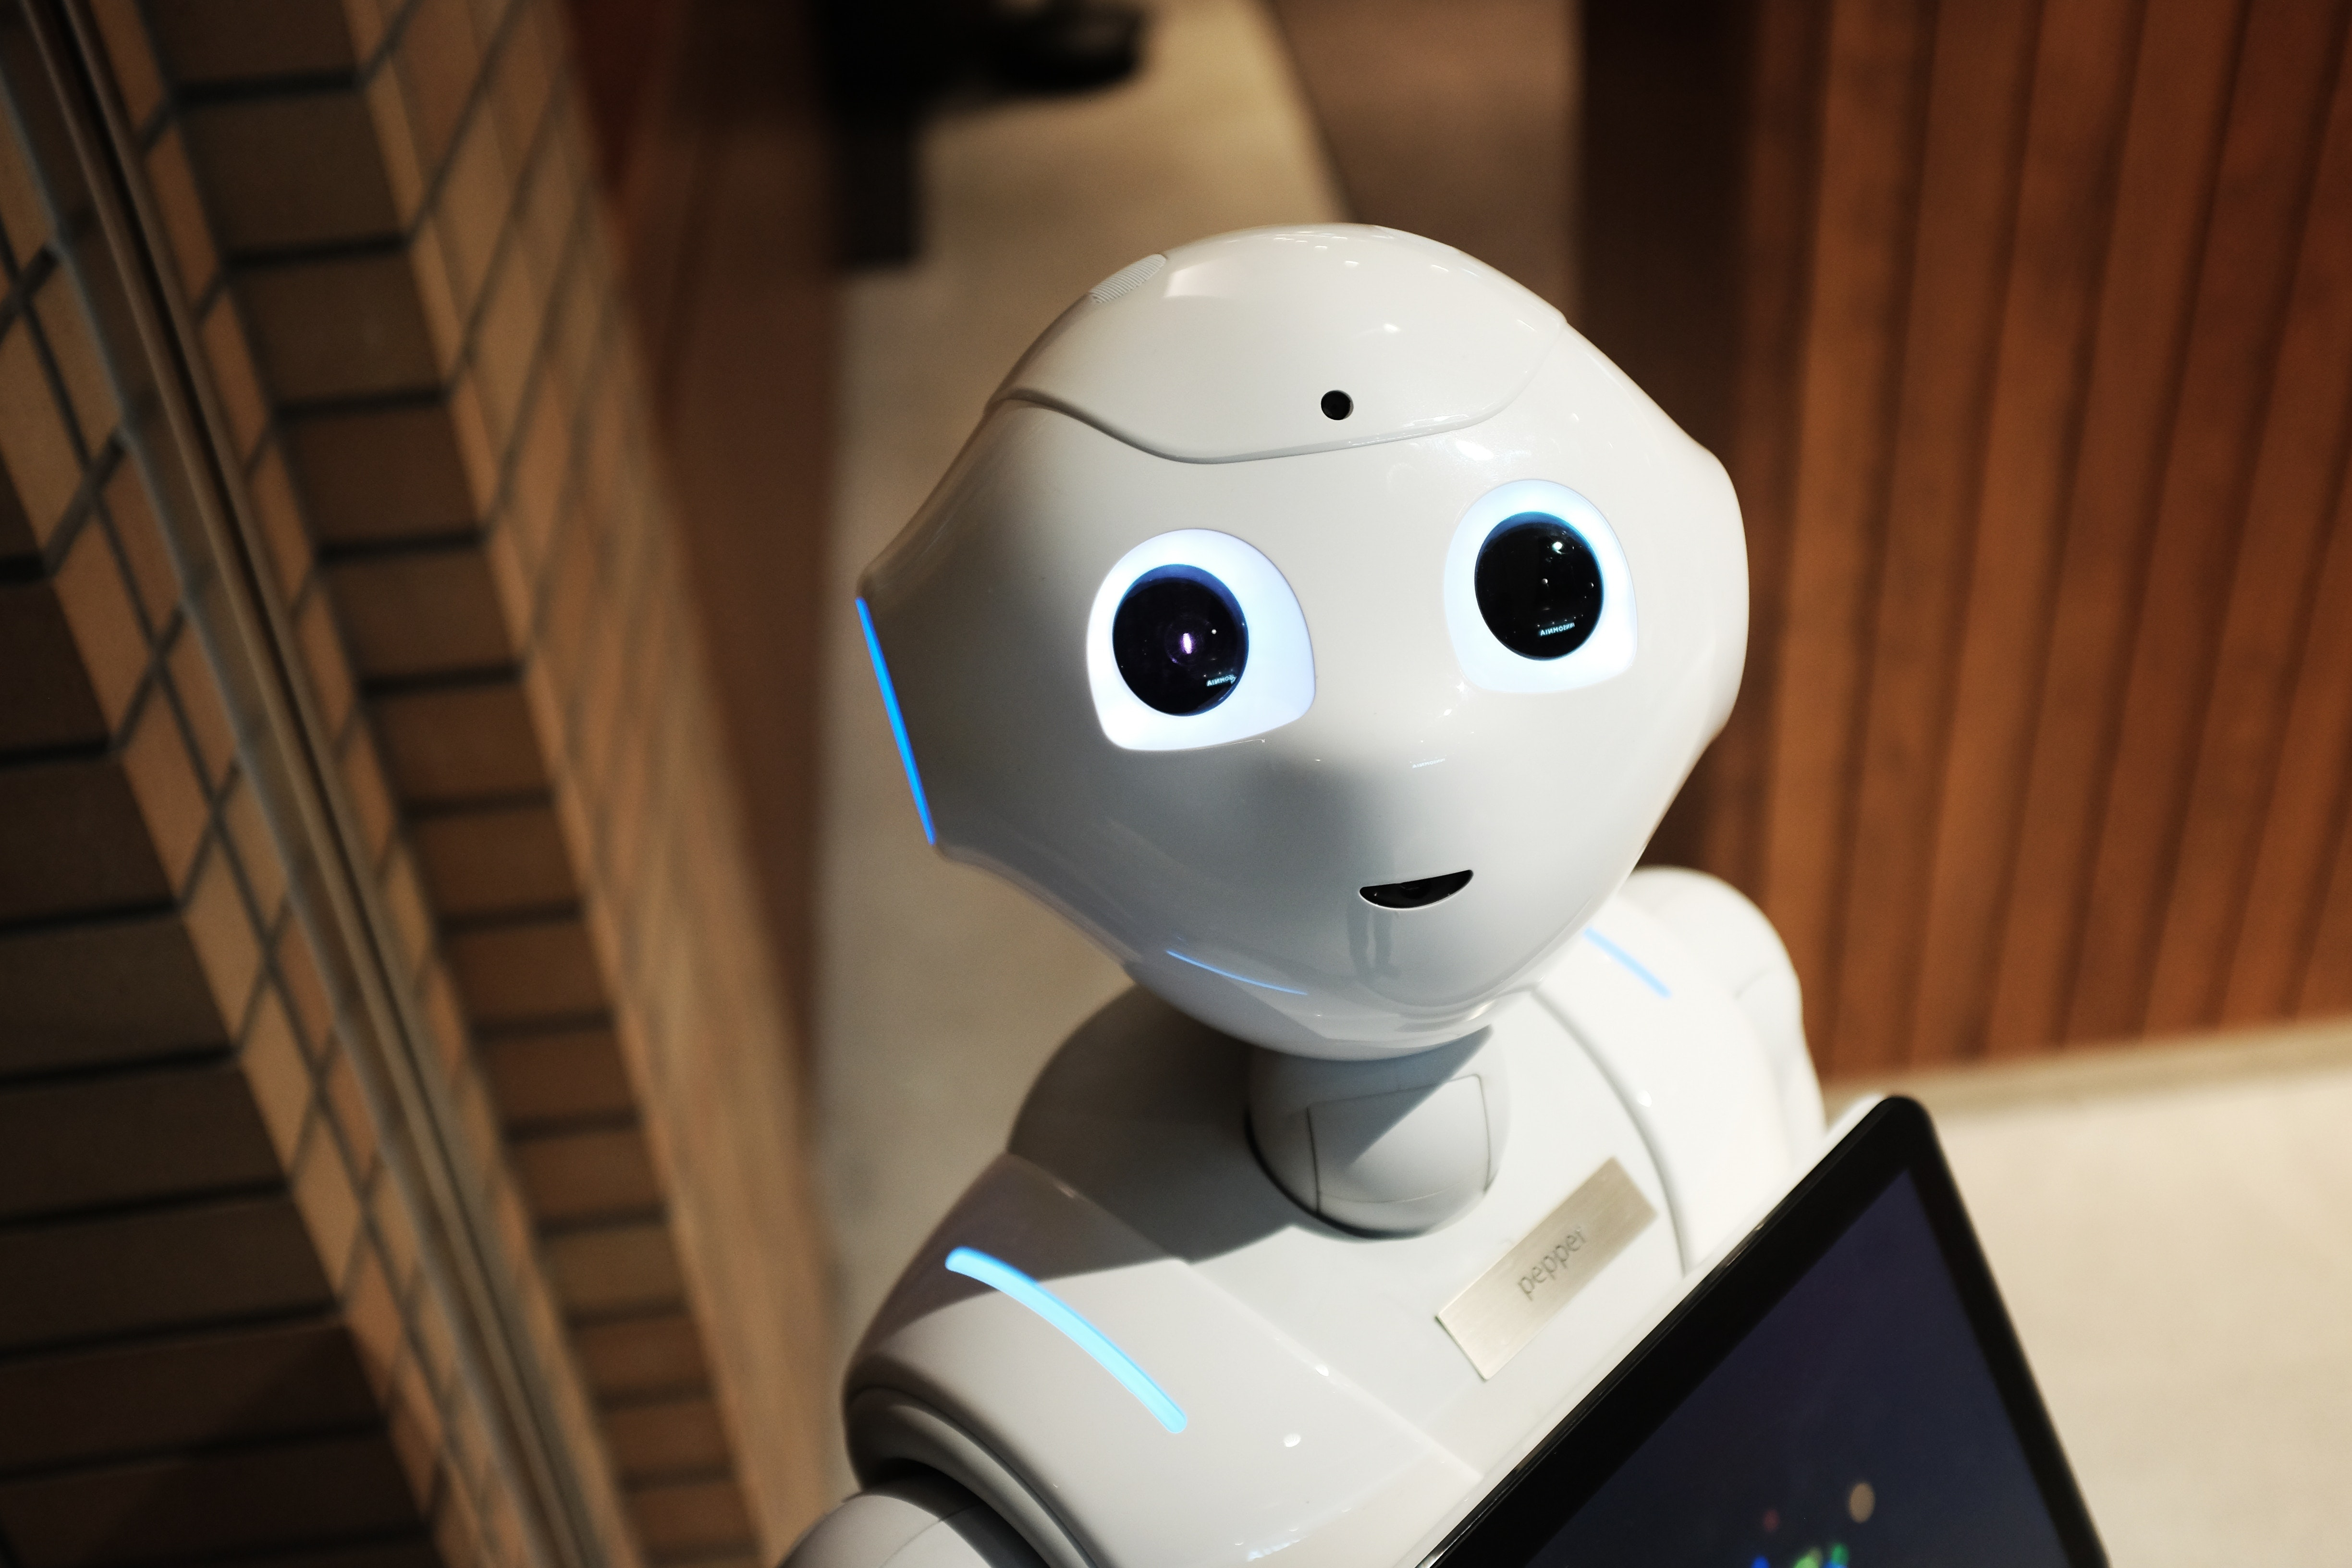



In [5]:
! pip install chembl_webresource_client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


This will import the python module for the ChEMBL database which will provide  a programmatic interface to the ChEMBL, a large publicly available database of bioactive molecules and drug targets.

In [6]:
#import the dependencies
import pandas as pd
from chembl_webresource_client.new_client import new_client

**This will perform a search for a target database specifically for the term 'Tyrosine Kinase 2' which is an enzyme shown to be central to what causes Psoriasis. It will store the search results in a Pandas DataFrame named 'targets'.**

In [7]:
#Target search for Amyloid beta
target = new_client.target
query_target = target.search('tyrosine kinase 2')
targets = pd.DataFrame.from_dict(query_target)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P29597', 'xref_name': None, 'xre...",Homo sapiens,Tyrosine-protein kinase TYK2,25.0,False,CHEMBL3553,"[{'accession': 'P29597', 'component_descriptio...",SINGLE PROTEIN,9606.0
1,[],Homo sapiens,Janus Kinase (JAK),25.0,False,CHEMBL2363062,"[{'accession': 'P52333', 'component_descriptio...",PROTEIN FAMILY,9606.0
2,[],Homo sapiens,JAK1/JAK2/TYK2,25.0,False,CHEMBL3301390,"[{'accession': 'P23458', 'component_descriptio...",PROTEIN COMPLEX,9606.0
3,[],Homo sapiens,JAK1/TYK2,25.0,False,CHEMBL3301391,"[{'accession': 'P23458', 'component_descriptio...",PROTEIN COMPLEX,9606.0
4,[],Homo sapiens,JAK2/TYK2,25.0,False,CHEMBL3301392,"[{'accession': 'O60674', 'component_descriptio...",PROTEIN COMPLEX,9606.0
...,...,...,...,...,...,...,...,...,...
3802,[],Homo sapiens,20S proteasome,0.0,False,CHEMBL3831201,"[{'accession': 'P49721', 'component_descriptio...",PROTEIN COMPLEX,9606.0
3803,[],Mus musculus,Glutamate NMDA receptor,0.0,False,CHEMBL3832634,"[{'accession': 'P35436', 'component_descriptio...",PROTEIN COMPLEX GROUP,10090.0
3804,[],Rattus norvegicus,Voltage-gated sodium channel,0.0,False,CHEMBL3988641,"[{'accession': 'O88457', 'component_descriptio...",PROTEIN FAMILY,10116.0
3805,[],Mycobacterium tuberculosis,Phosphotyrosine protein phosphatase,0.0,False,CHEMBL4295521,"[{'accession': 'A0A045ISB3', 'component_descri...",SINGLE PROTEIN,1773.0


**The fourth entry in the search will be selected assigned into the *'selected_target'* variable as in some papers and drugs treatments for psoriasis, this is the enzyme being targeted.**

In [8]:
#The selected target will be the 4th entry in the dataset 
selected_target = targets.target_chembl_id[3]
selected_target

'CHEMBL3301391'

**The Bioactivity data for the target protein (JAK1/TYK2 protein complex) will be filtered based on the IC50 (concentration of a drug that is required to inhibit 50% of the biological activity of a target protein (enzyme, receptor etc) and stored as a Pandas DataFrame object 'df'.**



In [9]:
#The Bioactivity data will be retrieved.
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')

In [10]:
df = pd.DataFrame.from_dict(res)
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,14751962,[],CHEMBL3299207,Inhibition of JAK1/TYK2 in human whole blood a...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,28.7
1,None,14751968,[],CHEMBL3299207,Inhibition of JAK1/TYK2 in human whole blood a...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,35.0
2,None,14751990,[],CHEMBL3299207,Inhibition of JAK1/TYK2 in human whole blood a...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,194.0
3,None,14752006,[],CHEMBL3299207,Inhibition of JAK1/TYK2 in human whole blood a...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,1290.0
4,None,14752008,[],CHEMBL3299207,Inhibition of JAK1/TYK2 in human whole blood a...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,1500.0


In [12]:
df.shape

(182, 45)

**The resulting data will be saved as a csv file.**

In [13]:
df.to_csv('TK2_raw.csv', index=False)

**Handling of Missing Data**

In [15]:
#filters missing data to only include only non-null values in the standard_value and canonical_smiles columns
df2 = df[df.standard_value.notna() & df.canonical_smiles.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,14751962,[],CHEMBL3299207,Inhibition of JAK1/TYK2 in human whole blood a...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,28.7
1,None,14751968,[],CHEMBL3299207,Inhibition of JAK1/TYK2 in human whole blood a...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,35.0
2,None,14751990,[],CHEMBL3299207,Inhibition of JAK1/TYK2 in human whole blood a...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,194.0
3,None,14752006,[],CHEMBL3299207,Inhibition of JAK1/TYK2 in human whole blood a...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,1290.0
4,None,14752008,[],CHEMBL3299207,Inhibition of JAK1/TYK2 in human whole blood a...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,1500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,None,22429275,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4675845,Inhibition of JAK1/TYK2 signaling pathway in h...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,427.0
178,None,23227196,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4825792,Inhibition of TYK2/JAK1 signaling pathway in h...,B,None,None,BAO_0000190,BAO_0000221,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,91.4
179,None,23227199,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL4825795,Inhibition of JAK1/JAK3 signaling pathway in h...,B,None,None,BAO_0000190,BAO_0000221,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,1611.7
180,None,24394640,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5041958,Inhibition of TYK2/JAK1 signalling in human PB...,B,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,22.2


In [17]:
#check for unique rows
len(df2.canonical_smiles.unique())

132

**Removing all the duplicates**

In [18]:
#this will remove all the duplicate values in the canonical_smiles column
df2_minus_dup = df2.drop_duplicates(['canonical_smiles'])
df2_minus_dup.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,14751962,[],CHEMBL3299207,Inhibition of JAK1/TYK2 in human whole blood a...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,28.7
1,None,14751968,[],CHEMBL3299207,Inhibition of JAK1/TYK2 in human whole blood a...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,35.0
2,None,14751990,[],CHEMBL3299207,Inhibition of JAK1/TYK2 in human whole blood a...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,194.0
3,None,14752006,[],CHEMBL3299207,Inhibition of JAK1/TYK2 in human whole blood a...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,1290.0
4,None,14752008,[],CHEMBL3299207,Inhibition of JAK1/TYK2 in human whole blood a...,B,None,None,BAO_0000190,BAO_0000223,...,Homo sapiens,JAK1/TYK2,9606,None,None,IC50,nM,UO_0000065,None,1500.0


In [19]:
df2_minus_dup.shape

(132, 45)

**Combining all the classes from the 'selection' variable and Preprocessing of the raw data**




In [20]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_minus_dup[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL2105759,CCS(=O)(=O)N1CC(CC#N)(n2cc(-c3ncnc4[nH]ccc34)c...,28.7
1,CHEMBL221959,C[C@@H]1CCN(C(=O)CC#N)C[C@@H]1N(C)c1ncnc2[nH]c...,35.0
2,CHEMBL1789941,N#CC[C@H](C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1,194.0
3,CHEMBL3039513,CC[C@@](C)(Nc1ccnc(-c2c[nH]c3ncccc23)n1)C(=O)N...,1290.0
4,CHEMBL3301607,O=C(Nc1nc2cccc(-c3ccc(CN4CCS(=O)(=O)CC4)cc3)n2...,1500.0
...,...,...,...
162,CHEMBL4635104,C[C@@H]1[C@@H]2CN(c3nc(Nc4cnn(C)c4)ncc3F)C[C@]...,1733.0
174,CHEMBL4297507,C[C@H]1CN(C(=O)CC#N)[C@]12CCN(c1ncnc3[nH]ccc13)C2,18.0
175,CHEMBL4459585,Cn1cc(-c2cn3nccc3c(-c3cnn([C@]4(CC#N)C[C@@H](C...,53.0
178,CHEMBL4864387,N#CCCn1cc(-c2nc(Nc3ccc4c(ccn4S(=O)(=O)C(F)(F)F...,91.4


**Save data**

In [21]:
df3.to_csv('TK2_preprocessed01.csv', index=False)

In [22]:
#load saved data
df4 = pd.read_csv('TK2_preprocessed01.csv')

**Making a bioactivity class column for the data which classifies if the compound is either 'active', 'inactive' or 'intermediate'.**


In [23]:
#classifies the bioactivity of the compound by its standard value.
bioactivity_threshold = ["inactive" if float(i) >= 10000 else "active" if float(i) <= 1000 else "intermediate" for i in df4.standard_value]

In [24]:
#converting the bioactivity class as a Pandas Dataframe and contatenating the DataFrame to the previous data
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2105759,CCS(=O)(=O)N1CC(CC#N)(n2cc(-c3ncnc4[nH]ccc34)c...,28.7,active
1,CHEMBL221959,C[C@@H]1CCN(C(=O)CC#N)C[C@@H]1N(C)c1ncnc2[nH]c...,35.0,active
2,CHEMBL1789941,N#CC[C@H](C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1,194.0,active
3,CHEMBL3039513,CC[C@@](C)(Nc1ccnc(-c2c[nH]c3ncccc23)n1)C(=O)N...,1290.0,intermediate
4,CHEMBL3301607,O=C(Nc1nc2cccc(-c3ccc(CN4CCS(=O)(=O)CC4)cc3)n2...,1500.0,intermediate
...,...,...,...,...
127,CHEMBL4635104,C[C@@H]1[C@@H]2CN(c3nc(Nc4cnn(C)c4)ncc3F)C[C@]...,1733.0,intermediate
128,CHEMBL4297507,C[C@H]1CN(C(=O)CC#N)[C@]12CCN(c1ncnc3[nH]ccc13)C2,18.0,active
129,CHEMBL4459585,Cn1cc(-c2cn3nccc3c(-c3cnn([C@]4(CC#N)C[C@@H](C...,53.0,active
130,CHEMBL4864387,N#CCCn1cc(-c2nc(Nc3ccc4c(ccn4S(=O)(=O)C(F)(F)F...,91.4,active


# **Save the Preprocessed data to csv**

In [25]:
df5.to_csv('TK2_preprocessed02.csv', index=False)

# **Part 2 of the Psoriasis Drug Discovery Machine Learning Model**

Descriptor calculation and Exploratory Data analysis.

In [26]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-03-01 12:25:16--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   195MB/s    in 0.4s    

2023-03-01 12:25:17 (195 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [27]:
df6 = pd.read_csv('TK2_preprocessed02.csv')
df6.head()

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL2105759,CCS(=O)(=O)N1CC(CC#N)(n2cc(-c3ncnc4[nH]ccc34)c...,28.7,active
1,CHEMBL221959,C[C@@H]1CCN(C(=O)CC#N)C[C@@H]1N(C)c1ncnc2[nH]c...,35.0,active
2,CHEMBL1789941,N#CC[C@H](C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1,194.0,active
3,CHEMBL3039513,CC[C@@](C)(Nc1ccnc(-c2c[nH]c3ncccc23)n1)C(=O)N...,1290.0,intermediate
4,CHEMBL3301607,O=C(Nc1nc2cccc(-c3ccc(CN4CCS(=O)(=O)CC4)cc3)n2...,1500.0,intermediate


In [28]:
df6.shape

(132, 4)

**Remove the 'canonical_smiles' column from the dataset and insert it into the last row.**

In [29]:
# create a modified 'canonical_smiles' column that contains the longest SMILES string from the original column
df_modified = df6.assign(canonical_smiles=df6['canonical_smiles'].str.split('.').apply(lambda x: max(x, key=len)))

# drop the original 'canonical_smiles' column and concatenate the modified column as the last column
df_clean_smiles = df_modified.drop(columns=['canonical_smiles']).join(
df6['canonical_smiles'].str.split('.').apply(lambda x: max(x, key=len)))

df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL2105759,28.7,active,CCS(=O)(=O)N1CC(CC#N)(n2cc(-c3ncnc4[nH]ccc34)c...
1,CHEMBL221959,35.0,active,C[C@@H]1CCN(C(=O)CC#N)C[C@@H]1N(C)c1ncnc2[nH]c...
2,CHEMBL1789941,194.0,active,N#CC[C@H](C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1
3,CHEMBL3039513,1290.0,intermediate,CC[C@@](C)(Nc1ccnc(-c2c[nH]c3ncccc23)n1)C(=O)N...
4,CHEMBL3301607,1500.0,intermediate,O=C(Nc1nc2cccc(-c3ccc(CN4CCS(=O)(=O)CC4)cc3)n2...
...,...,...,...,...
127,CHEMBL4635104,1733.0,intermediate,C[C@@H]1[C@@H]2CN(c3nc(Nc4cnn(C)c4)ncc3F)C[C@]...
128,CHEMBL4297507,18.0,active,C[C@H]1CN(C(=O)CC#N)[C@]12CCN(c1ncnc3[nH]ccc13)C2
129,CHEMBL4459585,53.0,active,Cn1cc(-c2cn3nccc3c(-c3cnn([C@]4(CC#N)C[C@@H](C...
130,CHEMBL4864387,91.4,active,N#CCCn1cc(-c2nc(Nc3ccc4c(ccn4S(=O)(=O)C(F)(F)F...


# **Calculation of Lipinski descriptors**

Lipinski's rule of five is a guideline used to determine if a chemical compound with a certain pharmacological or biological activity is likely to be an orally active drug in humans. The rule is based on the observation that most orally administered drugs are relatively small and moderately lipophilic molecules. The rule states that an orally active drug has no more than one violation of criteria such as:

1.   Having no more than 5 hydrogen bond donors (total number of nitrogen–hydrogen and oxygen–hydrogen bonds).
2.   No more than 10 hydrogen bond acceptors.
3.   A molecular mass less than 500 daltons; and
4.   A calculated octanol-water partition coefficient (Clog P or LogP) that does not exceed 5

Although the rule has been highly influential in drug discovery, only about 50% of orally administered new chemical entities actually conform to it. Exceptions to the rule have also been observed, such as with some natural products.

But for this project we will use this rule.

[**Check out the Wikipedia link for more info.**](https://en.wikipedia.org/wiki/Lipinski%27s_rule_of_five)

In [33]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import numpy as np

 **Calculate the Lipinski Descriptors**

In [34]:
#This based and refactored from Data Professor's lipinski function.

def lipinski(smiles, verbose=False):
    """
    Calculates Lipinski's Rule of Five descriptors for a list of SMILES strings.
    """
    # Convert SMILES strings to RDKit molecules
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    
    # Initialize array to store descriptor values
    descriptors = np.zeros((len(mols), 4))
    
    # Loop over molecules and calculate descriptors
    for i, mol in enumerate(mols):
        descriptors[i, 0] = Descriptors.MolWt(mol)  # Molecular weight
        descriptors[i, 1] = Descriptors.MolLogP(mol)  # LogP
        descriptors[i, 2] = Lipinski.NumHDonors(mol)  # Number of hydrogen bond donors
        descriptors[i, 3] = Lipinski.NumHAcceptors(mol)  # Number of hydrogen bond acceptors
    
    # Create Pandas DataFrame to store descriptor values and return it
    column_names = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors_df = pd.DataFrame(data=descriptors, columns=column_names)
    return descriptors_df

In [35]:
#run the function on df_clean_smiles.
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,371.426,1.09568,1.0,7.0
1,312.377,1.54478,1.0,5.0
2,306.373,3.46638,1.0,5.0
3,392.385,3.27900,3.0,5.0
4,425.514,1.97520,1.0,7.0
...,...,...,...,...
127,407.400,1.68890,2.0,7.0
128,310.361,1.29878,1.0,5.0
129,383.419,2.53586,0.0,9.0
130,479.419,3.78888,1.0,9.0


**Combining the dataframes**

Take a look at the two dataframes that will be combined.

In [36]:
df_lipinski, df6

(          MW     LogP  NumHDonors  NumHAcceptors
 0    371.426  1.09568         1.0            7.0
 1    312.377  1.54478         1.0            5.0
 2    306.373  3.46638         1.0            5.0
 3    392.385  3.27900         3.0            5.0
 4    425.514  1.97520         1.0            7.0
 ..       ...      ...         ...            ...
 127  407.400  1.68890         2.0            7.0
 128  310.361  1.29878         1.0            5.0
 129  383.419  2.53586         0.0            9.0
 130  479.419  3.78888         1.0            9.0
 131  377.399  2.22672         2.0            7.0
 
 [132 rows x 4 columns],
     molecule_chembl_id                                   canonical_smiles  \
 0        CHEMBL2105759  CCS(=O)(=O)N1CC(CC#N)(n2cc(-c3ncnc4[nH]ccc34)c...   
 1         CHEMBL221959  C[C@@H]1CCN(C(=O)CC#N)C[C@@H]1N(C)c1ncnc2[nH]c...   
 2        CHEMBL1789941       N#CC[C@H](C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1   
 3        CHEMBL3039513  CC[C@@](C)(Nc1ccnc(-c2c[nH]c3ncccc23

In [43]:
#combine the 2
df_combined = pd.concat([df6,df_lipinski], axis=1)
df_combined.head()

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL2105759,CCS(=O)(=O)N1CC(CC#N)(n2cc(-c3ncnc4[nH]ccc34)c...,28.7,active,371.426,1.09568,1.0,7.0
1,CHEMBL221959,C[C@@H]1CCN(C(=O)CC#N)C[C@@H]1N(C)c1ncnc2[nH]c...,35.0,active,312.377,1.54478,1.0,5.0
2,CHEMBL1789941,N#CC[C@H](C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1,194.0,active,306.373,3.46638,1.0,5.0
3,CHEMBL3039513,CC[C@@](C)(Nc1ccnc(-c2c[nH]c3ncccc23)n1)C(=O)N...,1290.0,intermediate,392.385,3.27900,3.0,5.0
4,CHEMBL3301607,O=C(Nc1nc2cccc(-c3ccc(CN4CCS(=O)(=O)CC4)cc3)n2...,1500.0,intermediate,425.514,1.97520,1.0,7.0


# **Converting IC50 to pIC50**

The **IC50** (half-maximal inhibitory concentration) will be converted to **pIC50** (negative logarithmic transformation of the IC50 value) so that the data can be uniformly distributed and make comparisons easier between compounds. Statistical analysis will also be more suitable for this kind of data.

In [56]:
#create two functions: 1 function converts IC50 to pIC50, and the other one normalizes the standard_value_norm column

def pIC50(input):
    """
    Calculates pIC50 values from standard_value_norm column and adds it to the input DataFrame.
    """
    input['pIC50'] = -np.log10(input['standard_value_norm'] * 10**-9)  # Calculate pIC50 and add column to input DataFrame
    return input.drop(columns='standard_value_norm')  # Drop standard_value_norm column and return modified DataFrame

# Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.
def norm_value(input):
    """
    Normalizes standard_value column in input DataFrame by capping values above 100,000,000 and adding
    a new column called standard_value_norm to the input DataFrame with the normalized values.
    """
    input['standard_value_norm'] = np.minimum(input['standard_value'], 100000000)  # Cap values above 100,000,000 and add column to input DataFrame
    return input.drop(columns='standard_value')  # Drop standard_value column and return modified DataFrame

In [57]:
df_combined.standard_value.describe()

count      132.000000
mean      1576.516136
std       3087.398477
min          0.530000
25%         53.000000
50%        196.500000
75%        940.250000
max      12500.000000
Name: standard_value, dtype: float64

In [58]:
#Normalize the standard_value of the data first
df_norm = norm_value(df_combined)
df_norm.head()

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL2105759,CCS(=O)(=O)N1CC(CC#N)(n2cc(-c3ncnc4[nH]ccc34)c...,active,371.426,1.09568,1.0,7.0,28.7
1,CHEMBL221959,C[C@@H]1CCN(C(=O)CC#N)C[C@@H]1N(C)c1ncnc2[nH]c...,active,312.377,1.54478,1.0,5.0,35.0
2,CHEMBL1789941,N#CC[C@H](C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1,active,306.373,3.46638,1.0,5.0,194.0
3,CHEMBL3039513,CC[C@@](C)(Nc1ccnc(-c2c[nH]c3ncccc23)n1)C(=O)N...,intermediate,392.385,3.27900,3.0,5.0,1290.0
4,CHEMBL3301607,O=C(Nc1nc2cccc(-c3ccc(CN4CCS(=O)(=O)CC4)cc3)n2...,intermediate,425.514,1.97520,1.0,7.0,1500.0


In [59]:
df_norm.standard_value_norm.describe()

count      132.000000
mean      1576.516136
std       3087.398477
min          0.530000
25%         53.000000
50%        196.500000
75%        940.250000
max      12500.000000
Name: standard_value_norm, dtype: float64

In [60]:
#convert IC50 to pIC50
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2105759,CCS(=O)(=O)N1CC(CC#N)(n2cc(-c3ncnc4[nH]ccc34)c...,active,371.426,1.09568,1.0,7.0,7.542118
1,CHEMBL221959,C[C@@H]1CCN(C(=O)CC#N)C[C@@H]1N(C)c1ncnc2[nH]c...,active,312.377,1.54478,1.0,5.0,7.455932
2,CHEMBL1789941,N#CC[C@H](C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1,active,306.373,3.46638,1.0,5.0,6.712198
3,CHEMBL3039513,CC[C@@](C)(Nc1ccnc(-c2c[nH]c3ncccc23)n1)C(=O)N...,intermediate,392.385,3.27900,3.0,5.0,5.889410
4,CHEMBL3301607,O=C(Nc1nc2cccc(-c3ccc(CN4CCS(=O)(=O)CC4)cc3)n2...,intermediate,425.514,1.97520,1.0,7.0,5.823909
...,...,...,...,...,...,...,...,...
127,CHEMBL4635104,C[C@@H]1[C@@H]2CN(c3nc(Nc4cnn(C)c4)ncc3F)C[C@]...,intermediate,407.400,1.68890,2.0,7.0,5.761201
128,CHEMBL4297507,C[C@H]1CN(C(=O)CC#N)[C@]12CCN(c1ncnc3[nH]ccc13)C2,active,310.361,1.29878,1.0,5.0,7.744727
129,CHEMBL4459585,Cn1cc(-c2cn3nccc3c(-c3cnn([C@]4(CC#N)C[C@@H](C...,active,383.419,2.53586,0.0,9.0,7.275724
130,CHEMBL4864387,N#CCCn1cc(-c2nc(Nc3ccc4c(ccn4S(=O)(=O)C(F)(F)F...,active,479.419,3.78888,1.0,9.0,7.039054


In [63]:
df_final.pIC50.describe()

count    132.000000
mean       6.641785
std        0.946307
min        4.903090
25%        6.026833
50%        6.706673
75%        7.275724
max        9.275724
Name: pIC50, dtype: float64

In [66]:
#save to csv
df_final.to_csv('TK2_JAK1_04_bioactivity_data_3class_pIC50.csv')

**Removing the rows with intermediate bioactivity class**

In [67]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL2105759,CCS(=O)(=O)N1CC(CC#N)(n2cc(-c3ncnc4[nH]ccc34)c...,active,371.426,1.09568,1.0,7.0,7.542118
1,CHEMBL221959,C[C@@H]1CCN(C(=O)CC#N)C[C@@H]1N(C)c1ncnc2[nH]c...,active,312.377,1.54478,1.0,5.0,7.455932
2,CHEMBL1789941,N#CC[C@H](C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1,active,306.373,3.46638,1.0,5.0,6.712198
5,CHEMBL3765822,CC(C)[C@@H](C)n1cc(-c2cc(C(C)(C)O)n(C)n2)c2[nH...,active,358.446,2.15170,3.0,7.0,7.187087
6,CHEMBL3644620,CCc1cc(O)c(F)cc1-c1ccc2c(-c3nc4c([nH]3)CCN(C(=...,active,566.641,5.00590,3.0,7.0,6.207608
...,...,...,...,...,...,...,...,...
126,CHEMBL4635625,C[C@@H]1[C@@H]2CN(c3nc(Nc4cnn(C)c4)ncc3F)C[C@]...,active,407.400,1.68890,2.0,7.0,6.718967
128,CHEMBL4297507,C[C@H]1CN(C(=O)CC#N)[C@]12CCN(c1ncnc3[nH]ccc13)C2,active,310.361,1.29878,1.0,5.0,7.744727
129,CHEMBL4459585,Cn1cc(-c2cn3nccc3c(-c3cnn([C@]4(CC#N)C[C@@H](C...,active,383.419,2.53586,0.0,9.0,7.275724
130,CHEMBL4864387,N#CCCn1cc(-c2nc(Nc3ccc4c(ccn4S(=O)(=O)C(F)(F)F...,active,479.419,3.78888,1.0,9.0,7.039054


In [68]:
#save to csv
df_2class.to_csv('TK2_JAK1_05_bioactivity_data_3class_pIC50.csv')

# **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [70]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

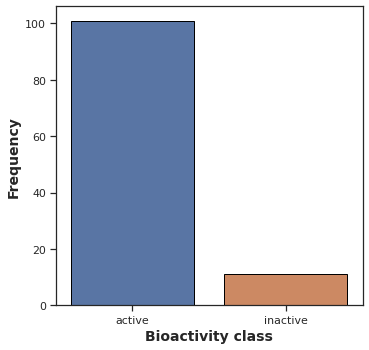

In [71]:
#Frequency plot of the 2 Bioactivity Classes
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

# **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.



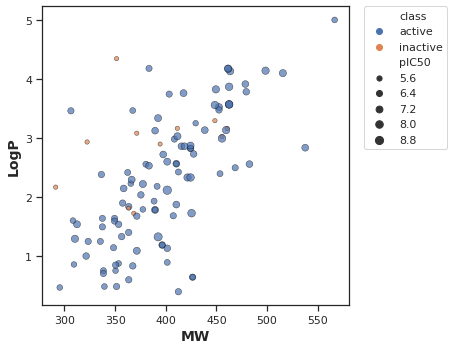

In [72]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **For 2 classes**

**pIC50 value**

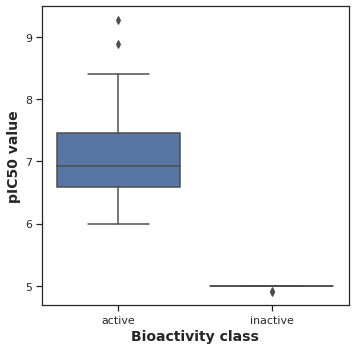

In [73]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**MW**

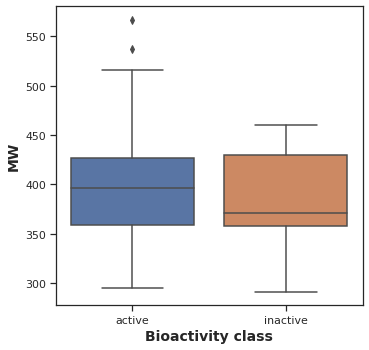

In [74]:

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')
     

**LogP**

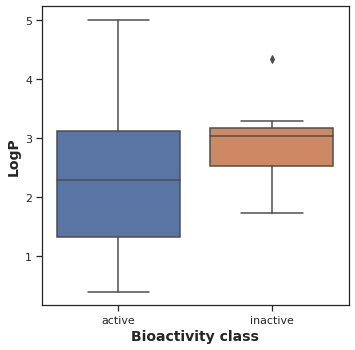

In [75]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Number of H-Donors**

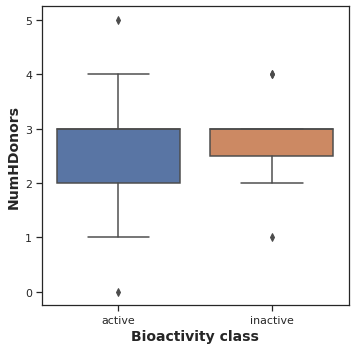

In [76]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Number of H-Acceptors**

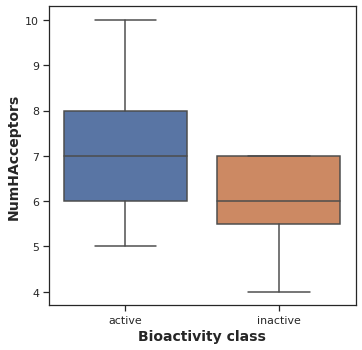

In [77]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

#### **For 3 classes***

**pIC50**

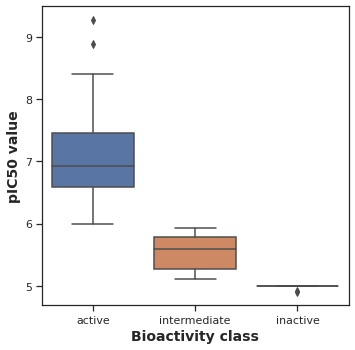

In [102]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**MW**

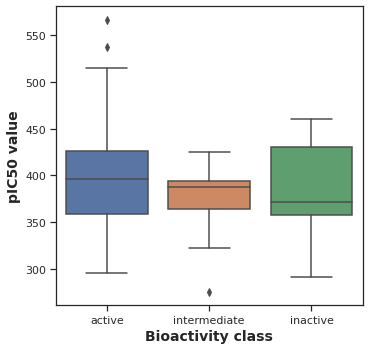

In [103]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**LogP**

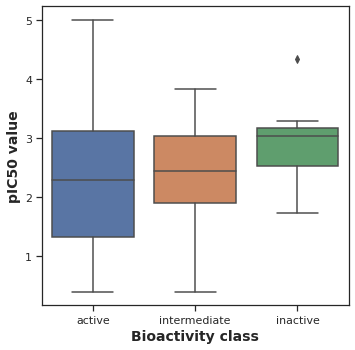

In [104]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**NumHDonor**

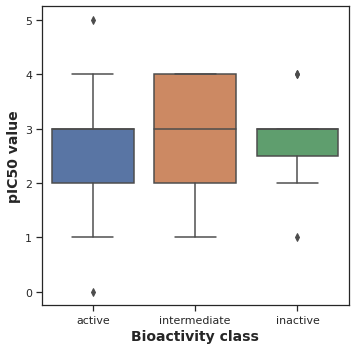

In [107]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**NumHAcceptors**

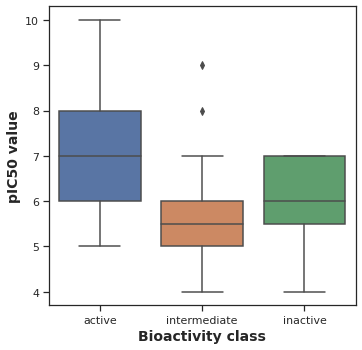

In [108]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_final)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

### **Statistical analysis | Mann-Whitney U Test**

The Mann-Whitney U test is a statistical method used to compare two groups of data that do not meet the requirements of other tests. It is used to find out if there is a significant difference between the medians of the two groups.

In [80]:
from scipy.stats import mannwhitneyu

def mannwhitney(descriptor, dataset=df_2class):
    # Get the values of the descriptor for the active and inactive classes
    active = df_2class[df_2class['class'] == 'active'][descriptor]
    inactive = df_2class[df_2class['class'] == 'inactive'][descriptor]
    
    # Use the Mann-Whitney U test to compare the samples
    stat, p = mannwhitneyu(active, inactive)
    
    # Determine the interpretation based on the p-value and significance level
    interpretation = 'Same distribution (fail to reject H0)' if p > 0.05 else 'Different distribution (reject H0)'
    
    # Store the results in a dictionary and return as a DataFrame
    results = {'Descriptor':descriptor, 'Statistics':stat, 'p':p, 'alpha':0.05, 'Interpretation':interpretation}
    return pd.DataFrame(results, index=[0])

mannwhitney('pIC50')
     


,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1111.0,5.709041e-08,0.05,Different distribution (reject H0)


In [81]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,626.0,0.493723,0.05,Same distribution (fail to reject H0)


In [82]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,360.0,0.056583,0.05,Same distribution (fail to reject H0)


In [83]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,464.0,0.349339,0.05,Same distribution (fail to reject H0)


In [84]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,750.5,0.051332,0.05,Same distribution (fail to reject H0)


### **Kruskal-Wallis Test**
The Kruskal-Wallis test will also be tried for comparison.

The Kruskal-Wallis test is a non-parametric statistical test that compares the medians of three or more independent groups to determine whether the groups are significantly different from each other. It is used when the data violates the assumptions of normality and equal variances required by parametric tests such as ANOVA.

In [97]:
from scipy.stats import kruskal

def kruskal_wallis_test(descriptor, dataset=df_final):
    # Get the values of the descriptor for each group in the dataset
    groups = dataset.groupby('class')[descriptor].apply(list).values.tolist()
    
    # Use the Kruskal-Wallis test to compare the groups
    stat, p = kruskal(*groups)
    
    # Determine the interpretation based on the p-value and significance level
    interpretation = 'Same distribution (fail to reject H0)' if p > 0.05 else 'Different distribution (reject H0)'
    
    # Store the results in a dictionary and return as a DataFrame
    results = {'Descriptor':descriptor, 'Statistics':stat, 'p':p, 'alpha':0.05, 'Interpretation':interpretation}
    return pd.DataFrame(results, index=[0])

kruskal_wallis_test('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,71.815142,2.544135e-16,0.05,Different distribution (reject H0)


In [98]:
kruskal_wallis_test('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3.004899,0.222584,0.05,Same distribution (fail to reject H0)


In [99]:
kruskal_wallis_test('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3.693224,0.157771,0.05,Same distribution (fail to reject H0)


In [100]:
kruskal_wallis_test('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,2.20709,0.331693,0.05,Same distribution (fail to reject H0)


In [101]:
kruskal_wallis_test('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,11.785261,0.00276,0.05,Different distribution (reject H0)


# **Interpretation**

**Mann-Whitney**

The first descriptor (pIC50) has a **different distribution** between the active and inactive compounds, which is to be expected since threshold values (IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives, corresponding to pIC50 > 6 = Actives and pIC50 < 5 = Inactives) were used to define actives and inactives.

The other descriptors (MW, LogP, NumHDonors, and NumHAcceptors) have **similar distributions** between the two groups.

**Kruskal-Wallis**

The first descriptor (pIC50) has a different distribution between the active, intermediate and inactive compounds, which is to be expected since threshold values were used to define actives and inactives.

The Hydrogen Acceptor discriptor showed a **significant difference** between classes while the other descriptors did not show significant difference between the classes

# **Part 3**

We will continue the model prediction although the data has the same distribution between the active and inactive based on the Lipinski descriptors, the dataset also passes for the Lipinski rules. Also, the parts of the dataset that will be used for prediction will be the canonical_smiles (the chemical structure of the compound) and the pIC50 of the compound against the TK2/JAK1 protein complex.


# **Descriptor Calculation and Dataset Preparation**

In [87]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
! unzip padel.zip

--2023-03-01 14:56:10--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-03-01 14:56:10--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   159MB/s    in 0.2s    

2023-03-01 14:56:11 (159 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-03-01 14:56:11--  https://github

In [146]:
#load bioactivity data
df_new = pd.read_csv('TK2_JAK1_05_bioactivity_data_3class_pIC50.csv')
df_new.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL2105759,CCS(=O)(=O)N1CC(CC#N)(n2cc(-c3ncnc4[nH]ccc34)c...,active,371.426,1.09568,1.0,7.0,7.542118
1,1,CHEMBL221959,C[C@@H]1CCN(C(=O)CC#N)C[C@@H]1N(C)c1ncnc2[nH]c...,active,312.377,1.54478,1.0,5.0,7.455932
2,2,CHEMBL1789941,N#CC[C@H](C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1,active,306.373,3.46638,1.0,5.0,6.712198
3,5,CHEMBL3765822,CC(C)[C@@H](C)n1cc(-c2cc(C(C)(C)O)n(C)n2)c2[nH...,active,358.446,2.15170,3.0,7.0,7.187087
4,6,CHEMBL3644620,CCc1cc(O)c(F)cc1-c1ccc2c(-c3nc4c([nH]3)CCN(C(=...,active,566.641,5.00590,3.0,7.0,6.207608


In [147]:
# Select the columns of interest
selection = ['canonical_smiles', 'molecule_chembl_id']
df_selection = df_new[selection]

# Save the selected columns to a smi file
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [148]:
#check the data
! cat molecule.smi | head -5

CCS(=O)(=O)N1CC(CC#N)(n2cc(-c3ncnc4[nH]ccc34)cn2)C1	CHEMBL2105759
C[C@@H]1CCN(C(=O)CC#N)C[C@@H]1N(C)c1ncnc2[nH]ccc12	CHEMBL221959
N#CC[C@H](C1CCCC1)n1cc(-c2ncnc3[nH]ccc23)cn1	CHEMBL1789941
CC(C)[C@@H](C)n1cc(-c2cc(C(C)(C)O)n(C)n2)c2[nH]nc(N)c2c1=O	CHEMBL3765822
CCc1cc(O)c(F)cc1-c1ccc2c(-c3nc4c([nH]3)CCN(C(=O)c3cnc(N5CCCCC5)cn3)C4)n[nH]c2c1	CHEMBL3644620


In [149]:
#check data count
! cat molecule.smi | wc -l

112


### **Calculate fingerprint descriptors**


**Calculate PaDEL descriptors**

This will convert the smile notations into numerical representation that can be fed into the algorithm. The PaDel Descriptor will convert the notations

In [150]:
#displays the content of PaDEL
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [151]:
#runs the PaDEL script
! bash padel.sh

Processing CHEMBL2105759 in molecule.smi (1/112). 
Processing CHEMBL221959 in molecule.smi (2/112). 
Processing CHEMBL1789941 in molecule.smi (3/112). Average speed: 2.43 s/mol.
Processing CHEMBL3765822 in molecule.smi (4/112). Average speed: 1.27 s/mol.
Processing CHEMBL3644620 in molecule.smi (5/112). Average speed: 1.09 s/mol.
Processing CHEMBL4101374 in molecule.smi (6/112). Average speed: 0.82 s/mol.
Processing CHEMBL4100431 in molecule.smi (7/112). Average speed: 0.82 s/mol.
Processing CHEMBL4092805 in molecule.smi (8/112). Average speed: 0.74 s/mol.
Processing CHEMBL3655082 in molecule.smi (9/112). Average speed: 0.70 s/mol.
Processing CHEMBL3655080 in molecule.smi (10/112). Average speed: 0.64 s/mol.
Processing CHEMBL4103698 in molecule.smi (11/112). Average speed: 0.61 s/mol.
Processing CHEMBL4098094 in molecule.smi (12/112). Average speed: 0.55 s/mol.
Processing CHEMBL3655097 in molecule.smi (13/112). Average speed: 0.53 s/mol.
Processing CHEMBL4100048 in molecule.smi (14/112

# **Preparing the X and Y Data Matrices**

**Creating the X Variable**

In [152]:
df_X = pd.read_csv('descriptors_output.csv')
df_X.head()

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL221959,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL2105759,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL1789941,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL3765822,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL4101374,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
108,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
109,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
110,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [154]:
df_X.shape

(112, 881)

**Y Variable**

In [155]:
df_Y = df_new['pIC50']
df_Y.head()

0    7.542118
1    7.455932
2    6.712198
3    7.187087
4    6.207608
Name: pIC50, dtype: float64

In [156]:
df_Y.shape

(112,)

# **Combine X and Y Variables**

In [157]:
dataset = pd.concat([df_X,df_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.542118
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.455932
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.712198
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.187087
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.207608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.718967
108,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.744727
109,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.275724
110,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.039054


In [158]:
#save
dataset.to_csv('TK2_JAK1_06_bioactivity_data_3class_pIC50.csv')

In [165]:
#load previous data
data = pd.read_csv('TK2_JAK1_06_bioactivity_data_3class_pIC50.csv')
data

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.542118
1,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.455932
2,2,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.712198
3,3,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.187087
4,4,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.207608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,107,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.718967
108,108,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.744727
109,109,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.275724
110,110,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.039054


**Separate X and Y Variables again**

In [166]:
X = dataset.iloc[:, :-1]
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
108,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
109,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
110,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [167]:
Y = dataset.iloc[:,-1]
Y

0      7.542118
1      7.455932
2      6.712198
3      7.187087
4      6.207608
         ...   
107    6.718967
108    7.744727
109    7.275724
110    7.039054
111    7.653647
Name: pIC50, Length: 112, dtype: float64

**Removing low variance datas**


In [168]:
from sklearn.feature_selection import VarianceThreshold

# This function removes low variance features from the input data
# Features with variance below the given threshold are discarded

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP12,PubchemFP17,PubchemFP19,PubchemFP23,PubchemFP33,PubchemFP115,PubchemFP116,PubchemFP129,PubchemFP130,PubchemFP143,...,PubchemFP709,PubchemFP710,PubchemFP737,PubchemFP756,PubchemFP763,PubchemFP767,PubchemFP800,PubchemFP819,PubchemFP826,PubchemFP830
0,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,1,0,1,0,1,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
4,1,0,1,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1,0,0,0,0,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,0
108,1,0,0,1,0,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
109,1,1,0,0,0,0,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
110,1,0,1,1,1,0,0,0,0,1,...,1,1,1,0,0,0,1,0,0,0


In [169]:
#convert dataset to csv
X.to_csv('descriptor_list.csv', index = False)

# **Random Forest Model**


In [170]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply mean normalization to the training and testing sets separately
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()

# Build and train the model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
r2 = model.score(X_test, y_test)


# Make predictions on the testing set
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

# **Neural Network Model**

In [186]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply mean normalization to the training and testing sets separately
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_train.mean()) / X_train.std()

# Build and train the model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=10)

# Evaluate the model on the testing set
mse = model.evaluate(X_test, y_test)

# Make predictions on the testing set
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

Epoch 1/100
9/9 [==============================] - 2s 5ms/step - loss: 41.6754
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 29.0146
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 18.6593
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 10.8186
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 6.2863
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 3.7517
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 2.5494
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 1.8642
Epoch 9/100
9/9 [==============================] - 0s 4ms/step - loss: 1.4088
Epoch 10/100
9/9 [==============================] - 0s 4ms/step - loss: 1.1806
Epoch 11/100
9/9 [==============================] - 0s 5ms/step - loss: 1.0463
Epoch 12/100
9/9 [==============================] - 0s 4ms/step - loss: 0.9218
Epoch 13/100
9/9 [==============================] - 0s 4m

# **Model Performance**

In [171]:
#Random Forest
print(f'Coefficient of determination (R^2): {r2} ')
print(f'Mean squared error (MSE): {mse}')


Coefficient of determination (R^2): 0.3329472101489097 
Mean squared error (MSE): 0.4663078982464638


In [187]:
print(f'Coefficient of determination (R^2): {r2} ')
print(f'Mean squared error (MSE): {mse}')

Coefficient of determination (R^2): 0.3329472101489097 
Mean squared error (MSE): 10.729535102844238


# **Result Visualization**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

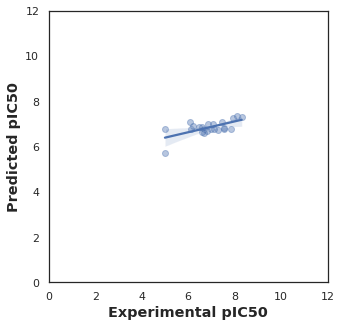

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, predictions, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

# **Comparing Models**

The Random Forest Model I used will be compared to other ML models using lazypredict

In [175]:
! pip install lazypredict


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.8 MB 1.4 MB/s 
     |████████████████████████████████| 255.9 MB 35 kB/s 
     |████████████████████████████████| 2.0 MB 26.3 MB/s 
     |████████████████████████████████| 96 kB 4.8 MB/s 
     |████████████████████████████████| 297 kB 56.1 MB/s 
     |████████████████████████████████| 38.1 MB 68 kB/s 


In [176]:
import seaborn as sns
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [178]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:31<00:00,  1.33it/s]


'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:23<00:00,  1.81it/s]


In [179]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,19829251314483403297326837967455820840396370293...,-2163191052489098633435473234463270664408064555...,130960263658848955091563631547359153881088.00,0.17
KernelRidge,54.99,-57.90,6.83,0.06
LarsCV,4.56,-2.88,1.75,0.57
QuantileRegressor,1.92,-0.00,0.89,0.22
LassoLars,1.92,0.00,0.89,0.07
DummyRegressor,1.92,0.00,0.89,0.04
ElasticNet,1.92,0.00,0.89,0.08
Lasso,1.92,0.00,0.89,0.05
LassoLarsCV,1.38,0.59,0.57,0.11


In [180]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,73289250676927536154984654221282985786923398037...,-5396753913482846075621140030667893302087732992...,19423280895335459295059848966116244505138489331...,0.15
TransformedTargetRegressor,13651302537104207009284096.00,-100523227773221887977455616.00,8382807551205.32,0.03
LinearRegression,13651302537104207009284096.00,-100523227773221887977455616.00,8382807551205.32,0.05
LarsCV,14.14,-95.78,8.23,0.52
GaussianProcessRegressor,10.33,-67.67,6.93,0.10
KernelRidge,10.22,-66.87,6.89,0.03
MLPRegressor,3.12,-14.62,3.30,0.43
DecisionTreeRegressor,1.44,-2.26,1.51,0.03
LGBMRegressor,1.22,-0.62,1.06,0.05


# **Visualization of Model Performance**

[(0.0, 1.0)]

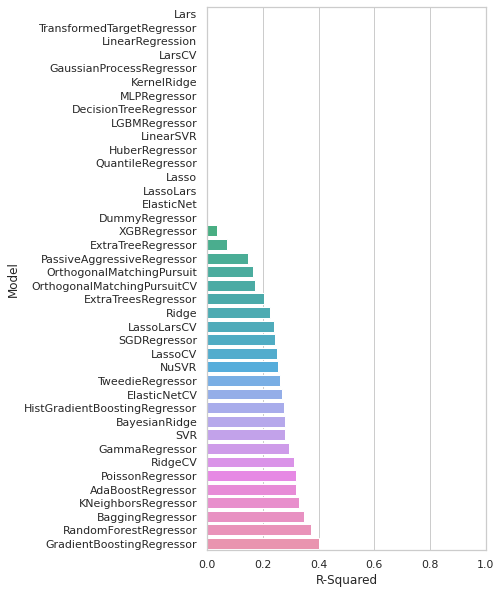

In [182]:
# Bar plot of R-squared values
#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

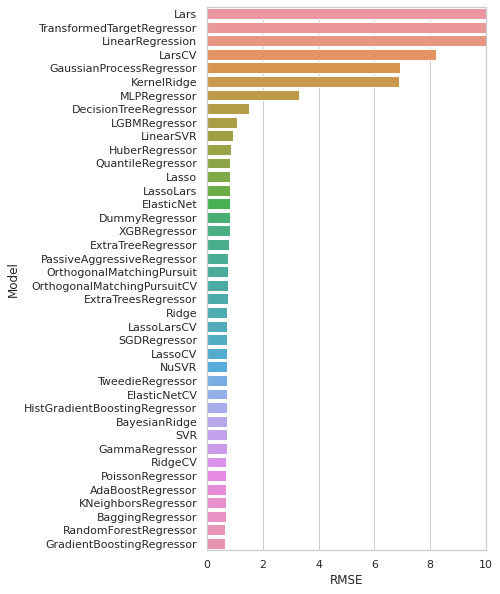

In [183]:
# Bar plot of RMSE values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="RMSE", data=predictions_test)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

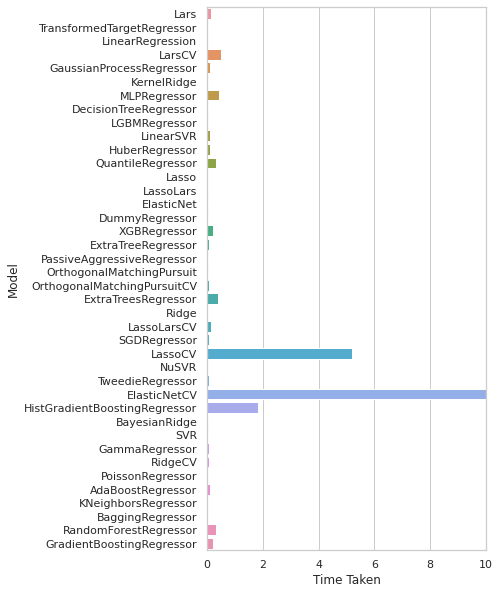

In [185]:
# Bar plot of calculation time

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="Time Taken", data=predictions_test)
ax.set(xlim=(0, 10))

# **My Takeaway from this project...**

According to the results generated by lazypredict, and evaluation of the models used, it appears that the model's ability to accurately predict pIC50 values is limited due to the small sample size of the data and the distribution of the bioactivity class being skewed towards active compounds. Additionally, the lack of significant differences in lipinski descriptors between the two classes further contributes to the model's inaccuracies.

To improve the accuracy of the model, more data is required, and further research is needed to develop better approaches.

In [188]:
! zip -r results.zip . -i *.csv *.pdf

  adding: TK2_preprocessed01.csv (deflated 78%)
  adding: plot_MW.pdf (deflated 39%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: TK2_raw.csv (deflated 90%)
  adding: descriptor_list.csv (deflated 94%)
  adding: TK2_JAK1_06_bioactivity_data_3class_pIC50.csv (deflated 95%)
  adding: TK2_JAK1_05_bioactivity_data_3class_pIC50.csv (deflated 73%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 15%)
  adding: descriptors_output.csv (deflated 96%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: TK2_JAK1_04_bioactivity_data_3class_pIC50.csv (deflated 73%)
  adding: TK2_preprocessed02.csv (deflated 80%)
